**Installing Dependencies and loading the data**.[https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset]

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
#upload the kaggle json before executing this
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets download cosmos98/twitter-and-reddit-sentimental-analysis-dataset

 50% 5.00M/10.0M [00:00<00:00, 15.4MB/s]
100% 10.0M/10.0M [00:00<00:00, 29.0MB/s]


In [6]:
!unzip "/content/twitter-and-reddit-sentimental-analysis-dataset.zip"


Archive:  /content/twitter-and-reddit-sentimental-analysis-dataset.zip
  inflating: Reddit_Data.csv         
  inflating: Twitter_Data.csv        


In [7]:
#pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Importing Packages

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
#import preprocess_kgptalkie as ps
import re
import pickle
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
l = ["Reddit_Data.csv", "Twitter_Data.csv"]
for i in l:
    df = pd.read_csv("/content/"+i+"")

In [10]:
df.isnull().any()

clean_text    True
category      True
dtype: bool

In [11]:
df = df.dropna()
df = df.replace(-1,2)

In [12]:
df.isnull().any()

clean_text    False
category      False
dtype: bool

In [13]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,2.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [14]:
'''def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x 
    '''

'def get_clean(x):\n    x = str(x).lower().replace(\'\\\', \'\').replace(\'_\', \' \')\n    x = ps.cont_exp(x)\n    x = ps.remove_emails(x)\n    x = ps.remove_urls(x)\n    x = ps.remove_html_tags(x)\n    x = ps.remove_accented_chars(x)\n    x = ps.remove_special_chars(x)\n    x = re.sub("(.)\\1{2,}", "\\1", x)\n    return x \n    '

In [15]:
def get_clean(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

In [16]:
df['clean_text'] = df['clean_text'].apply(lambda x: get_clean(x))

In [17]:
df.head()

,clean_text,category
0,modi promised minimum government maximum gover...,2.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


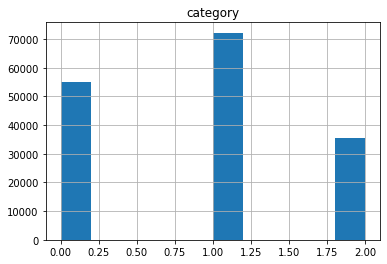

In [18]:
df.hist(column='category');

In [19]:
tfidf = TfidfVectorizer(max_features=5000)

In [20]:
x = df['clean_text']
y = df['category']

In [21]:
x = tfidf.fit_transform(x)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

LinearSVC

In [ ]:
model_svc = LinearSVC()
model_svc.fit(X_train, y_train)
model_svc.score(X_test, y_test)

0.9046757071853715

In [ ]:
y_pred = model_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     11015
         1.0       0.94      0.89      0.91     14547
         2.0       0.88      0.82      0.85      7032

    accuracy                           0.90     32594
   macro avg       0.90      0.90      0.90     32594
weighted avg       0.91      0.90      0.90     32594



**XGBoost**

In [ ]:
model_xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.8327606307909431

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86     11015
         1.0       0.90      0.80      0.85     14547
         2.0       0.83      0.68      0.75      7032

    accuracy                           0.83     32594
   macro avg       0.83      0.82      0.82     32594
weighted avg       0.84      0.83      0.83     32594



***Random Forest ***

In [29]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=30, random_state=0)
model_rf.fit(X_train, y_train)
model_rf.score(X_test,y_test)

0.6621464073142296

In [30]:
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66     11015
         1.0       0.61      0.90      0.73     14547
         2.0       0.90      0.26      0.40      7032

    accuracy                           0.66     32594
   macro avg       0.75      0.59      0.60     32594
weighted avg       0.71      0.66      0.63     32594



In [ ]:
from sklearn import model_selection
pickle.dump(model_svc,open('model_svc','wb'))
pickle.dump(model_xgb,open('model_xgb','wb'))
pickle.dump(model_rf,open('model_rf','wb'))
pickle.dump(tfidf, open("vectorizer.pickle", "wb"))

Testing

In [ ]:
x = ''# enter input here to predict by the model
x = get_clean(x)
vec = tfidf.transform([x])
vec.shape
model_xgb.predict(vec)        #updating the model name to 

array([1.])